In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv('./df_smoted.csv')
dataset = df.drop(['x1', 'x2', 'x8', 'x14', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25','x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33','x34', 'x35', 'x36','x37','x38', 'x39', 'x40'], axis='columns')
dataset.head()

,x3,x4,x5,x6,x7,x9,x10,x11,x12,x13,x15,x16,x17,x18,Class
0,-1.3,-1.2,-0.6,-0.6,0.7,1.2,1.5,5.2,3.4,4.1,5.2,4.5,3.7,1.9,1.0
1,2.4,3.5,4.8,3.6,6.0,3.7,2.6,1.1,0.6,-0.6,1.8,0.5,1.1,-0.6,0.0
2,0.4,2.4,4.0,5.4,6.8,2.5,2.7,2.1,3.4,-0.3,0.6,-0.1,-1.0,-1.2,1.0
3,-0.6,2.5,0.7,-0.1,2.7,2.3,2.6,1.6,3.9,3.8,3.9,2.3,3.5,2.4,1.0
4,0.7,2.1,1.1,0.8,2.1,0.4,1.6,2.2,0.9,4.6,3.3,2.3,3.5,3.3,0.0


In [4]:
#Create x and y variables
x = dataset.drop('Class', axis=1).values
y = dataset['Class'].values

# Train and Test Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Import Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
#Base DT and Random Forest Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('DT', DecisionTreeClassifier()),('RDF',RandomForestClassifier())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))          


Estimator: DT
[[386  69]
 [ 64 384]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       455
         1.0       0.85      0.86      0.85       448

    accuracy                           0.85       903
   macro avg       0.85      0.85      0.85       903
weighted avg       0.85      0.85      0.85       903


Estimator: RDF
[[416  39]
 [ 67 381]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       455
         1.0       0.91      0.85      0.88       448

    accuracy                           0.88       903
   macro avg       0.88      0.88      0.88       903
weighted avg       0.88      0.88      0.88       903



C:\Users\Meryl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(0,pipe_rdf)

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=100))])
pipeline.insert(1,pipe_dt)

# Set grid search params 

modelpara =[]

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}
modelpara.insert(1,param_griddt)

In [7]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()

Decision Tree - Learning Curve


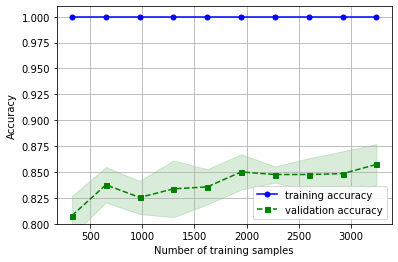


Random Forest - Learning Curve


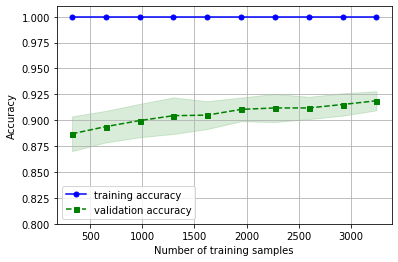

In [8]:
#Plot Learning Curve
print('Decision Tree - Learning Curve')
plot_learning_curves(pipe_dt)
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)

Model Evaluation - Accuracy Score
Decision Tree 0.85 +/- 0.02
Random Forest 0.92 +/- 0.01




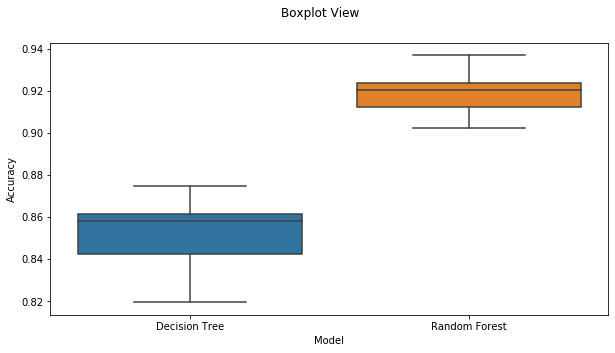

In [10]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Decision Tree',pipe_dt))
models.append(('Random Forest',pipe_rdf))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=5, n_repeats=1, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [11]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=5, n_repeats=1, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2)
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\n')
    
    #Feature Importance - optimized
    print('Feature Importances')
    for name, score in zip(list(dataset),gs_clf.best_estimator_.named_steps['clf'].feature_importances_):
        print(name, round(score,2))
    
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred))
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')

In [12]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)


Feature Importances
x3 0.03
x4 0.04
x5 0.06
x6 0.05
x7 0.04
x9 0.07
x10 0.12
x11 0.2
x12 0.15
x13 0.06
x15 0.05
x16 0.04
x17 0.05
x18 0.04

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 100}

 [[421  34]
 [ 50 398]]

               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       455
         1.0       0.92      0.89      0.90       448

    accuracy                           0.91       

Decision Tree

Permutation Importance




Weight,Feature
0.1132 ± 0.0255,x11
0.0709 ± 0.0157,x10
0.0611 ± 0.0133,x9
0.0538 ± 0.0142,x6
0.0383 ± 0.0154,x12
0.0312 ± 0.0118,x17
0.0175 ± 0.0051,x7
0.0168 ± 0.0078,x15
0.0151 ± 0.0080,x13
0.0146 ± 0.0098,x16


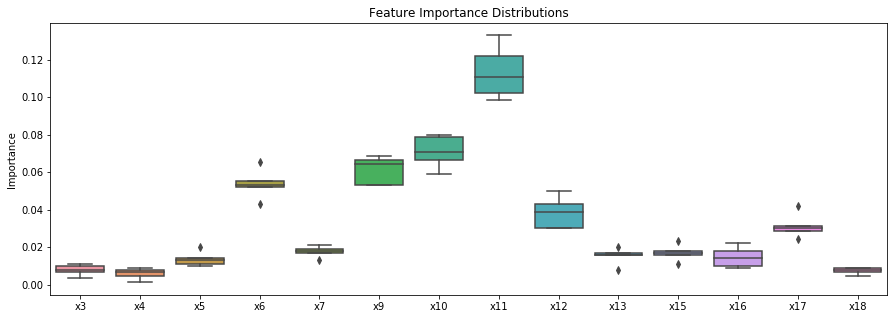

Random Forest

Permutation Importance




Weight,Feature
0.1010 ± 0.0191,x11
0.0558 ± 0.0143,x10
0.0456 ± 0.0129,x12
0.0332 ± 0.0074,x9
0.0244 ± 0.0051,x17
0.0217 ± 0.0057,x16
0.0166 ± 0.0056,x6
0.0166 ± 0.0070,x15
0.0166 ± 0.0142,x5
0.0157 ± 0.0068,x7


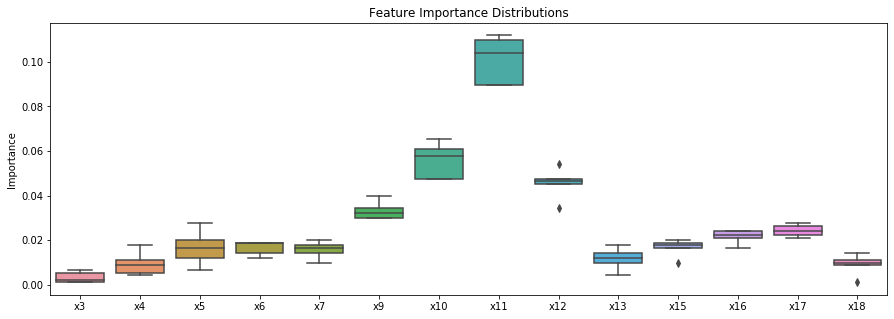

In [14]:
#Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=dataset.drop('Class', axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=dataset.drop('Class', axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()